# Training Model with Random Forest Regressor

This notebook demonstrates how to train a **Random Forest Regressor** to predict poker action probabilities (`Fold`, `Check`, `Call`, `Raise`, `All-In`) based on features like `Hand Strength` and `Max Rank Frequency`.

The goal is to:
1. Train the model to predict action probabilities.
2. Normalize the probabilities to ensure they sum to 1.
3. Determine the best move for each hand based on the highest probability.
4. Visualize the results to better understand the model's predictions.

## Dataset Preparation

We use the `model_ready_data.csv` file, which contains:
- **Features (`X`)**: Input features like `Hand Strength` and `Max Rank Frequency`.
- **Target (`y`)**: Action probabilities (`Fold`, `Check`, `Call`, `Raise`, `All-In`).

The dataset is loaded and prepared for training.

In [15]:
# Load the dataset
import pandas as pd

data_frame = pd.read_csv('training_data.csv')

# Define features (X) and target (y)
features = ['Hand Strength', 'Max Rank Frequency']  # Add more features if needed
target = ['Fold', 'Check', 'Call', 'Raise', 'All-In']

X = data_frame[features]
y = data_frame[target]

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data_frame.head())

Dataset Preview:
   Suit of Card 1  Suit of Card 2  Suit of Card 3  Suit of Card 4  \
0               1               0               0               0   
1               0               0               0               1   
2               0               1               0               0   
3               0               0               0               1   
4               1               0               1               0   

   Suit of Card 5  Rank of Card 1  Rank of Card 2  Rank of Card 3  \
0               0               7              10              12   
1               0              12               2               3   
2               1               3               6               6   
3               1               8               2               2   
4               0               3               3              13   

   Rank of Card 4  Rank of Card 5  ...  Unique Ranks  Unique Suits  Hand Type  \
0               4               7  ...             4             3   One

## Model Training

We use the **Random Forest Regressor** because:
- It handles non-linear relationships well.
- It works for multi-output regression (predicting probabilities for multiple actions).
- It provides feature importance, which helps us understand the model.

The model is trained on the entire dataset, and the training score (R²) is calculated to assess how well the model fits the data.

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import joblib  # For saving the trained model

# Load the training dataset
training_data = pd.read_csv('training_data.csv')

# Define features (X) and target (y)
features = ['Hand Strength', 'Max Rank Frequency']  # Add more features if needed
target = ['Fold', 'Check', 'Call', 'Raise', 'All-In']

X_train = training_data[features]
y_train = training_data[target]

# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)

# Train the model on the training set
model.fit(X_train, y_train)

# Get the training score (R²)
training_score = model.score(X_train, y_train)
print(f"Training Score (R²): {training_score}")



Training Score (R²): 0.9998205995137717
Model saved as 'trained_model.pkl'


## Predictions and Normalization

The model predicts action probabilities for each hand. Since the predicted probabilities may not naturally sum to 1, we normalize them to ensure they represent valid percentages.

In [18]:
import numpy as np

# Predict action probabilities
y_pred = model.predict(X)

# Normalize the predicted probabilities
y_pred_normalized = np.clip(y_pred, 0, 1)  # Clip values to be between 0 and 1
y_pred_normalized = y_pred_normalized / y_pred_normalized.sum(axis=1, keepdims=True)

# Display the first few normalized predictions
print("Normalized Predicted Probabilities:")
print(pd.DataFrame(y_pred_normalized, columns=target).head())

Normalized Predicted Probabilities:
   Fold  Check  Call  Raise  All-In
0   0.3    0.5   0.2    0.0     0.0
1   0.3    0.5   0.2    0.0     0.0
2   0.1    0.1   0.6    0.2     0.0
3   0.3    0.5   0.2    0.0     0.0
4   0.3    0.5   0.2    0.0     0.0


## Best Move Prediction

For each hand, the action with the highest probability is selected as the best move. This helps us determine the most likely optimal action for each scenario.

In [19]:
# Determine the best move for each row
actions = target  # ['Fold', 'Check', 'Call', 'Raise', 'All-In']
best_moves = [actions[np.argmax(row)] for row in y_pred_normalized]

# Combine probabilities and best moves into a DataFrame
results_df = pd.DataFrame(y_pred_normalized, columns=actions)
results_df['Best Move'] = best_moves

# Format probabilities to two decimal places
results_df = results_df.applymap(lambda x: f"{x:.2f}" if isinstance(x, float) else x)

# Display the first few rows of probabilities and best moves
print("Predicted Probabilities and Best Moves:")
print(results_df.head())

Predicted Probabilities and Best Moves:
   Fold Check  Call Raise All-In Best Move
0  0.30  0.50  0.20  0.00   0.00     Check
1  0.30  0.50  0.20  0.00   0.00     Check
2  0.10  0.10  0.60  0.20   0.00      Call
3  0.30  0.50  0.20  0.00   0.00     Check
4  0.30  0.50  0.20  0.00   0.00     Check


/tmp/ipykernel_799/1018045715.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  results_df = results_df.applymap(lambda x: f"{x:.2f}" if isinstance(x, float) else x)


## Training Score

The **training score** measures how well the model fits the training data. A higher score value (closer to 1.0) indicates a better fit. This score helps us assess the model's performance before visualizing the results.

In [20]:
# Determine the actual best moves from the target probabilities
actual_best_moves = [actions[np.argmax(row)] for row in y.values]

# Calculate the training accuracy
training_accuracy = np.mean(np.array(best_moves) == np.array(actual_best_moves))

print(f"Training Accuracy: {training_accuracy:.2%}")

Training Accuracy: 100.00%


## Graphical Representations

### 1. Feature Importance
Visualizing feature importance helps us understand which features contribute the most to the model's predictions.

### 2. Predicted Probabilities
We visualize the predicted probabilities for a few rows to better understand the model's output.

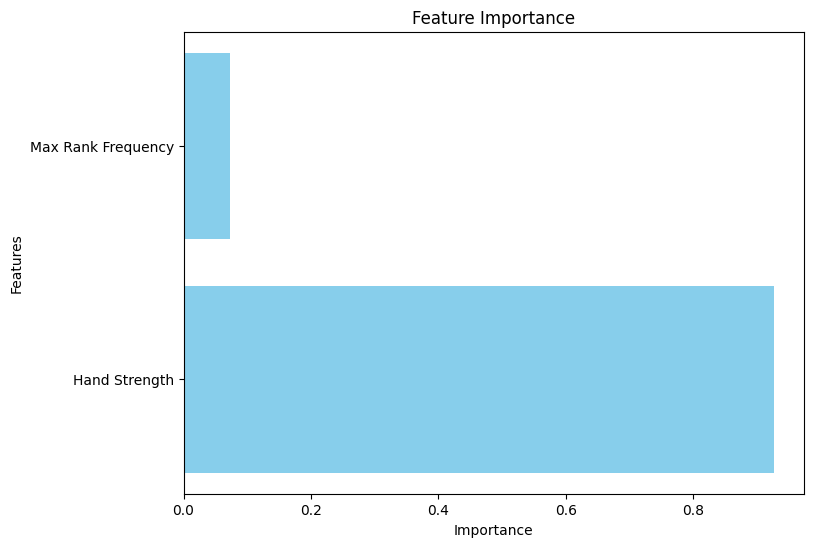

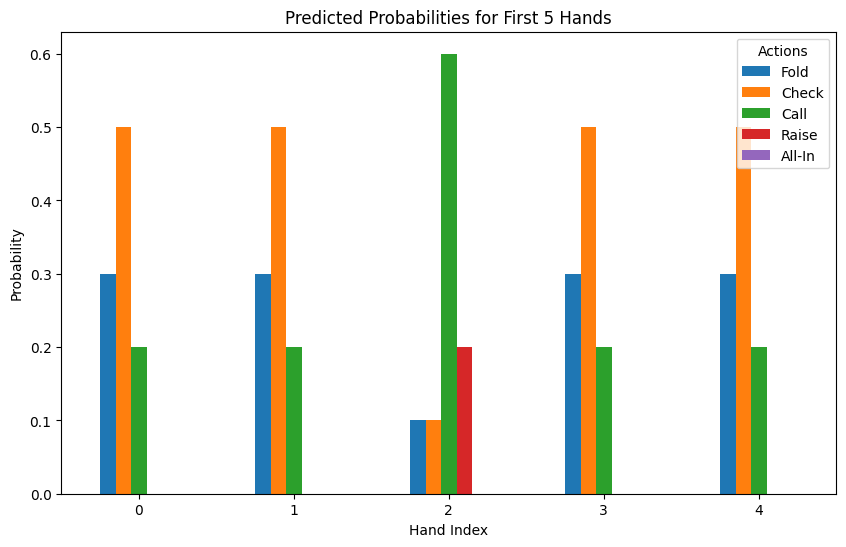

In [ ]:
import matplotlib.pyplot as plt

# Feature Importance
feature_importance = model.feature_importances_
plt.figure(figsize=(8, 6))
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

# Predicted Probabilities for the First 5 Rows
predicted_df = pd.DataFrame(y_pred_normalized[:5], columns=target)
predicted_df.plot(kind='bar', figsize=(10, 6))
plt.title('Predicted Probabilities for First 5 Hands')
plt.xlabel('Hand Index')
plt.ylabel('Probability')
plt.xticks(rotation=0)
plt.legend(title='Actions')
plt.show()